In [9]:
import numpy as np
import pandas as pd

In [5]:
flux = np.load(r"D:\文\jupyter\My_git\jupyter\data\Flux_all.npy")   # 我的数据
label = np.load(r"D:\文\jupyter\My_git\jupyter\data\labels_all.npy",allow_pickle=True) 
# label = np.load(r"D:\文\jupyter\My\data\LABELS\old_above_50.npy",allow_pickle=True)  # 林博宇数据

# 按信噪比将数据分为两个子训练集

In [8]:
label_raw = pd.DataFrame(label, columns=['Teff[K]', 'Logg', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH',
                                 'KH', 'CaH', 'TiH', 'CrH','MnH', 'FeH', 'NiH', 'snrg'])  
label_raw = label_raw.applymap(lambda x: float(x))  # 变为数值
label_raw

,Teff[K],Logg,CH,NH,OH,MgH,AlH,SiH,SH,KH,CaH,TiH,CrH,MnH,FeH,NiH,snrg
0,4989.2680,3.069958,-0.200940,0.120560,-0.106187,-0.019775,-0.035709,-0.048952,-0.240818,-0.119401,-0.011693,-0.006803,-0.062744,-0.098858,-0.053620,-0.067237,9.42
1,4544.2554,1.897227,-0.567916,-0.343530,-0.305197,-0.366517,-0.403269,-0.393779,-0.245588,-0.531711,-0.375625,-0.530781,-0.575806,-0.551038,-0.521550,-0.482307,8.63
2,4675.4670,2.473533,-0.370620,-0.213210,-0.189687,-0.161397,-0.275509,-0.291185,-0.352033,-0.361341,-0.367335,-0.375549,-0.388796,-0.374308,-0.387440,-0.354017,9.93
3,5043.7800,3.091270,-0.386841,-0.165110,-0.197482,-0.191291,-0.253059,-0.223538,-0.377508,-0.152371,-0.234616,-0.235694,-0.382356,-0.311498,-0.303670,-0.281197,9.92
4,4155.8457,1.062138,-1.158169,-0.675250,-0.905167,-0.954493,-1.033679,-0.953669,-0.624928,-0.995241,-1.081608,-1.103873,-1.033986,-1.128098,-1.048000,-1.051708,5.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272157,5101.2040,2.731851,-1.435423,-1.975500,-1.233897,-1.348957,-1.944619,-1.383779,-1.141058,-1.878441,-1.300785,-1.888507,-1.559386,-1.824798,-1.481800,-1.593007,179.61
272158,5451.0840,4.494823,-0.164960,-0.264660,-0.083559,-0.080851,-0.048078,-0.072296,-0.067986,-0.193987,-0.166220,-0.303761,-0.167979,-0.138897,-0.126020,-0.132720,123.23
272159,5425.9517,4.484500,-0.064070,-0.065842,0.100955,0.069323,0.103328,0.080835,-0.034515,-0.036237,0.053912,-0.092927,-0.022622,0.055540,0.031676,0.037208,256.51
272160,4668.0986,4.591280,-0.139725,-0.066335,-0.053063,-0.036293,-0.059832,-0.079747,-0.095047,-0.139457,-0.094035,-0.095422,-0.112924,-0.121527,-0.081792,-0.087319,134.90


In [21]:
#定义掩码
condition_5_50 = label_raw['snrg'] < 50
condition_50_999 = label_raw['snrg'] >= 50

# 使用条件掩码拆分数据集
label_5_50 = label[condition_5_50]
flux_5_50 = flux[condition_5_50]
label_50_999 = label[condition_50_999]
flux_50_999 = flux[condition_50_999] 

In [18]:
flux.shape

(272162, 3456)

In [19]:
flux_50_999.shape

(168890, 3456)

In [20]:
flux_5_50.shape

(103272, 3456)

In [ ]:
np.save(r"D:\文\jupyter\My_git\jupyter\data\label_5_50.npy", label_5_50)
np.save(r"D:\文\jupyter\My_git\jupyter\data\label_50_999.npy", label_50_999)
np.save(r"D:\文\jupyter\My_git\jupyter\data\Flux_5_50.npy", flux_5_50)
np.save(r"D:\文\jupyter\My_git\jupyter\data\Flux_50_999.npy", flux_50_999)

# 按参数分布分子训练集

In [3]:
# 去除空值
rows_with_nan = np.isnan(flux).any(axis=1)  
indices_of_rows_with_nan = np.where(rows_with_nan)[0]  # 空值索引
flux = np.delete(flux, indices_of_rows_with_nan, axis=0)
label = np.delete(label, indices_of_rows_with_nan, axis=0)

label = pd.DataFrame(label, columns=['Teff[K]', 'Logg', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH',
                                 'KH', 'CaH', 'TiH', 'CrH','MnH', 'FeH', 'NiH', 'snrg'])  
label = label.applymap(lambda x: float(x))  # 变为数值

In [14]:
# label = pd.read_csv(r"D:\文\jupyter\My\jupyter\0_raw_data\data\apogee_aspcap_dr17_data_valid_notnull.csv")

# label = pd.read_csv(r"D:\文\jupyter\数据\StarGRUNet\1_FITS_files_download_and_preprocessing\match.csv")

In [9]:
label = pd.DataFrame(label, columns=['Teff[K]', 'Logg', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH',
                                 'KH', 'CaH', 'TiH', 'CrH','MnH', 'FeH', 'NiH', 'snrg'])

In [15]:
label

,col1,inputobjs_input_id,inputobjs_input_ra,inputobjs_input_dec,inputobjs_dist,combined_obsid,combined_obsdate,combined_planid,combined_snrg,combined_class,...,ASPCAP_KH,ASPCAP_CaH,ASPCAP_TiH,ASPCAP_CrH,ASPCAP_MnH,ASPCAP_FeH,ASPCAP_NiH,GroupID,GroupSize,Separation
0,0,0,0.001335,57.619530,0.055723,269515241,2014-11-20,HD000408N565515V01,134.23,STAR,...,-0.110687,-0.382105,-0.082451,-1.365442,-0.189337,-0.252970,-0.361720,NaN,NaN,0.0
1,1,2,0.002850,57.173164,0.101147,269503140,2014-11-20,HD000408N565515V01,5.56,STAR,...,-0.187431,-0.122039,-0.138996,-0.131376,-0.190028,-0.160280,-0.101207,NaN,NaN,0.0
2,2,3,0.004322,15.430942,0.031439,55001239,2012-09-28,EG000313N173308V_2,23.60,STAR,...,-0.013967,-0.210554,-0.182131,-0.336042,-0.203157,-0.261890,-0.299310,NaN,NaN,0.0
3,3,20,0.034096,56.574017,0.086621,269404189,2014-11-20,HD000408N565515B01,64.56,STAR,...,-0.106501,-0.225620,-0.413017,-0.442336,-0.450528,-0.309330,-0.325378,NaN,NaN,0.0
4,4,34,0.055350,57.432327,0.055520,269503144,2014-11-20,HD000408N565515V01,38.70,STAR,...,0.097212,0.022355,0.042105,0.056140,0.063991,0.020928,0.012207,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288459,288459,523121,359.956045,14.757119,0.038965,66611145,2012-10-13,EG000024N121601B01,73.42,STAR,...,-0.085311,-0.258065,-0.200207,-0.437106,-0.539598,-0.434360,-0.317537,NaN,NaN,0.0
288460,288460,523122,359.956473,15.488585,0.080982,54901240,2012-09-28,EG000313N173308V_1,140.91,STAR,...,-0.420891,-0.377282,-0.381160,-0.433846,-0.464538,-0.420240,-0.364607,68771.0,2.0,0.0
288461,288461,523123,359.956473,15.488585,0.080982,54901240,2012-09-28,EG000313N173308V_1,140.91,STAR,...,-0.420891,-0.377282,-0.381160,-0.433846,-0.464538,-0.420240,-0.364607,68771.0,2.0,0.0
288462,288462,523130,359.968864,15.876052,0.031985,54902074,2012-09-28,EG000313N173308V_1,7.41,STAR,...,0.265949,0.174198,0.395296,0.113344,-0.053508,-0.018275,0.099208,NaN,NaN,0.0


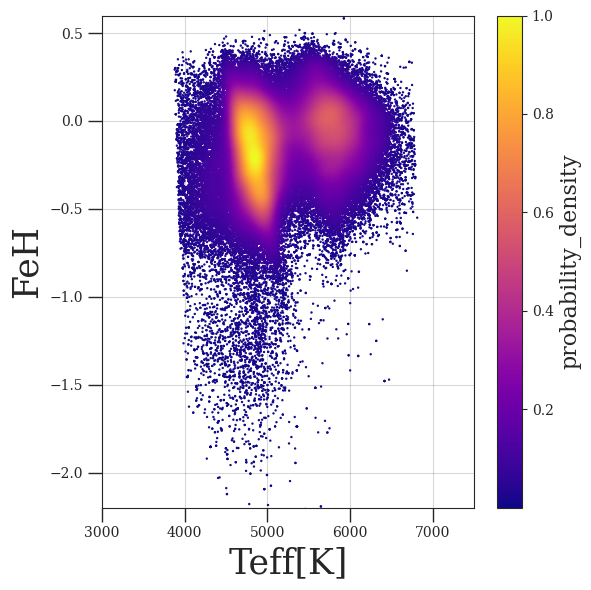

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.gridspec as gridspec  # 导入 gridspec

def probability_density_plot(data, param_x='Teff[K]', param_y='FeH', s=0.5, cmap='plasma', square=True, xlim=None, ylim=None):
    # 设置Matplotlib图形样式
    plt.rcParams['axes.facecolor'] = 'white'  # 设置图表背景颜色为白色
    sns.set_style("ticks")  # 设置图表样式为带有刻度线
    plt.rcParams['axes.grid'] = True  # 启用网格线
    plt.rcParams['grid.color'] = 'gray'  # 网格线颜色设置为灰色
    plt.rcParams['grid.alpha'] = '0.3'  # 设置网格线的透明度
    plt.rc('text', usetex=False)  # 不使用TeX排版
    plt.rc('font', family='serif')  # 设置字体为衬线字体

    # 提取数据
    x = data[param_x]
    y = data[param_y]

    # 计算核密度估计
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    z = z / z.max()
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # 创建图形，如果square为True，创建正方形图
    if square:
        fig, ax0 = plt.subplots(figsize=(6, 6))
    else:
        fig = plt.figure(figsize=(8, 2.4))
        gs = gridspec.GridSpec(1, 1)
        ax0 = plt.subplot(gs[0, 0])

    points = ax0.scatter(x, y, c=z, s=s, cmap=cmap)

    # 设置坐标轴标签和标题
    ax0.set_xlabel(param_x, fontsize=25)
    ax0.set_ylabel(param_y, fontsize=25)

    # 设置刻度标签大小和样式
    ax0.tick_params(labelsize=10, width=1, length=10)

    # 添加颜色条
    cbar = plt.colorbar(points)
    cbar.set_label('probability_density', fontsize=16)

    # 如果xlim和ylim不为None，则设置自定义的坐标轴范围
    if xlim is not None:
        ax0.set_xlim(xlim)
    if ylim is not None:
        ax0.set_ylim(ylim)

    # 调整布局
    plt.tight_layout()

    # 保存图形
    plt.savefig('probability_density_plot.png')

# 使用示例
# 假设您有一个包含'Teff[K]'和'FeH'列的DataFrame或数据
# data = ...

# 调用函数创建概率密度图，可以选择设置square、xlim和ylim参数
probability_density_plot(label, param_x='Teff[K]', param_y='FeH',square=True, xlim=(3000, 7500), ylim=(-2.2, 0.6))

# 拆分数据集

In [21]:
def split_data_by_condition(label, flux, column, a, b):
    # 创建条件掩码
    condition_1 = label[column] < a
    condition_2 = (a <= label[column]) & (label[column] < b)
    condition_3 = label[column] >= b

    # 使用条件掩码拆分数据集
    label_1 = label[condition_1]
    flux_1 = flux[condition_1]
    label_2 = label[condition_2]
    flux_2 = flux[condition_2]
    label_3 = label[condition_3]
    flux_3 = flux[condition_3]

    return label_1, flux_1, label_2, flux_2, label_3, flux_3

In [22]:
label_1, flux_1, label_2, flux_2, label_3, flux_3=split_data_by_condition(label, flux, 'FeH', -1, 1)

In [27]:
flux_1

array([[-0.03225104, -0.03225104, -0.03225104, ..., -0.32033871,
        -0.32033871, -0.32033871],
       [-0.02843569, -0.02843569, -0.02843569, ...,  0.03680242,
         0.03680242,  0.03680242],
       [-1.40851142, -1.40851142, -1.40851142, ...,  1.37041435,
         1.37041435,  1.37041435],
       ...,
       [-3.13217435, -3.13217435, -3.13217435, ...,  0.00945607,
         0.00945607,  0.00945607],
       [-2.07681443, -2.07681443, -2.07681443, ..., -0.16741621,
        -0.16741621, -0.16741621],
       [-4.92696263, -4.92696263, -4.92696263, ..., -0.15030112,
        -0.15030112, -0.15030112]])